In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("/content/Amazon Sale Report.csv")

In [3]:
df = data.copy()

In [4]:
df.shape

(28381, 21)

In [5]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0.0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1.0,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1.0,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0.0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1.0,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28381 entries, 0 to 28380
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               28381 non-null  int64  
 1   Order ID            28381 non-null  object 
 2   Date                28381 non-null  object 
 3   Status              28381 non-null  object 
 4   Fulfilment          28380 non-null  object 
 5   Sales Channel       28380 non-null  object 
 6   ship-service-level  28380 non-null  object 
 7   Category            28380 non-null  object 
 8   Size                28380 non-null  object 
 9   Courier Status      28380 non-null  object 
 10  Qty                 28380 non-null  float64
 11  currency            26627 non-null  object 
 12  Amount              26627 non-null  float64
 13  ship-city           28368 non-null  object 
 14  ship-state          28368 non-null  object 
 15  ship-postal-code    28368 non-null  float64
 16  ship

# Data cleaning

most of the features contains either the constant or null values so we have to drop those features which are not relevent to the analysis.

In [7]:
df.drop("index",axis=1,inplace = True)

In [8]:
df["New"].unique()

array([nan])

In [9]:
df.drop("New",axis=1,inplace = True)

In [10]:
df["PendingS"].unique()

array([nan])

In [11]:
df.drop("PendingS",axis = 1,inplace = True)

In [12]:
df["currency"].unique()

array(['INR', nan], dtype=object)

In [13]:
df.drop("currency",axis=1,inplace = True)

In [14]:
df["ship-country"].unique()

array(['IN', nan], dtype=object)

In [15]:
df.drop("ship-country",axis=1,inplace=True)

In [16]:
df.drop("Order ID",axis=1,inplace=True)

In [40]:
df["fulfilled-by"].unique()

array(['Easy Ship', nan], dtype=object)

In [41]:
df.drop("fulfilled-by",axis=1,inplace=True)

In [42]:
df.head()

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
0,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0.0,647.62,MUMBAI,MAHARASHTRA,400081.0,False
1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1.0,406.00,BENGALURU,KARNATAKA,560085.0,False
2,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1.0,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,True
3,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0.0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,False
4,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1.0,574.00,CHENNAI,TAMIL NADU,600073.0,False


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28381 entries, 0 to 28380
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                28381 non-null  datetime64[ns]
 1   Status              28381 non-null  object        
 2   Fulfilment          28380 non-null  object        
 3   Sales Channel       28380 non-null  object        
 4   ship-service-level  28380 non-null  object        
 5   Category            28380 non-null  object        
 6   Size                28380 non-null  object        
 7   Courier Status      28380 non-null  object        
 8   Qty                 28380 non-null  float64       
 9   Amount              26627 non-null  float64       
 10  ship-city           28368 non-null  object        
 11  ship-state          28368 non-null  object        
 12  ship-postal-code    28368 non-null  float64       
 13  B2B                 28380 non-null  object    

In [44]:
df["Date"] = pd.to_datetime(df["Date"])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28381 entries, 0 to 28380
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                28381 non-null  datetime64[ns]
 1   Status              28381 non-null  object        
 2   Fulfilment          28380 non-null  object        
 3   Sales Channel       28380 non-null  object        
 4   ship-service-level  28380 non-null  object        
 5   Category            28380 non-null  object        
 6   Size                28380 non-null  object        
 7   Courier Status      28380 non-null  object        
 8   Qty                 28380 non-null  float64       
 9   Amount              26627 non-null  float64       
 10  ship-city           28368 non-null  object        
 11  ship-state          28368 non-null  object        
 12  ship-postal-code    28368 non-null  float64       
 13  B2B                 28380 non-null  object    

# neumerical features

In [46]:
neumerical_feature = [feature for feature in df.columns if df[feature].dtype != "O"]

In [47]:
neumerical_feature

['Date', 'Qty', 'Amount', 'ship-postal-code']

the dataset contains these features 'Date', 'Qty', 'Amount', 'ship-postal-code'  are belongs to the neumerical features.

# Categorical features

In [48]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

In [49]:
categorical_features

['Status',
 'Fulfilment',
 'Sales Channel',
 'ship-service-level',
 'Category',
 'Size',
 'Courier Status',
 'ship-city',
 'ship-state',
 'B2B']

# Null values

In [50]:
for feature in neumerical_feature:
  print(feature,df[feature].isnull().sum())

Date 0
Qty 1
Amount 1754
ship-postal-code 13


In [51]:
for feature in categorical_features:
  print(feature,df[feature].isnull().sum())

Status 0
Fulfilment 1
Sales Channel 1
ship-service-level 1
Category 1
Size 1
Courier Status 1
ship-city 13
ship-state 13
B2B 1


In [52]:
df.describe()

,Date,Qty,Amount,ship-postal-code
count,28381,28380.000000,26627.000000,28368.000000
mean,2022-04-21 15:47:13.853634560,0.896547,619.508916,462932.194374
min,2022-04-13 00:00:00,0.000000,0.000000,110001.000000
25%,2022-04-17 00:00:00,1.000000,432.000000,380006.000000
50%,2022-04-22 00:00:00,1.000000,568.000000,500019.000000
75%,2022-04-26 00:00:00,1.000000,759.000000,600028.000000
max,2022-04-30 00:00:00,15.000000,5495.000000,989898.000000
std,NaN,0.338944,270.146749,194912.101592


# Analysis

**1.categorical features**

In [53]:
df.head()

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
0,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0.0,647.62,MUMBAI,MAHARASHTRA,400081.0,False
1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1.0,406.00,BENGALURU,KARNATAKA,560085.0,False
2,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1.0,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,True
3,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0.0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,False
4,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1.0,574.00,CHENNAI,TAMIL NADU,600073.0,False


<ipython-input-84-ff2ac4e00f13>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["Status"],palette="plasma")


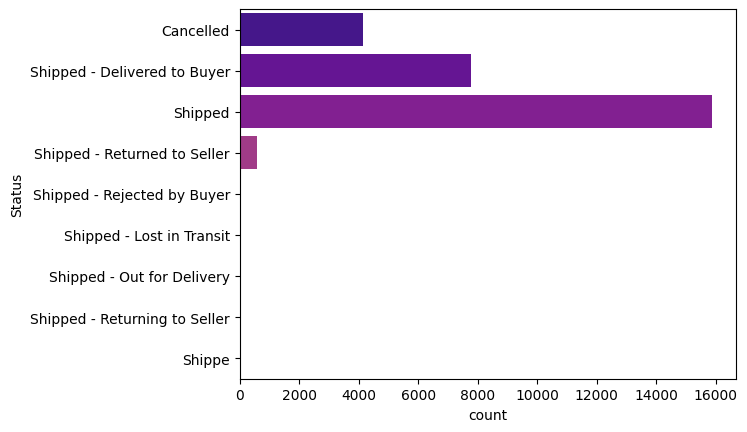

In [84]:
sns.countplot(df["Status"],palette="plasma")
plt.show()

**Observations**<br>

---


1.the large no of products are shipped to the customer<br>
2.from the shipped products the half of the products are delivered to the customer <br>
3.some of products gets cancelled

<ipython-input-55-23dc2f9aee1f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["Fulfilment"],palette="Reds")


[]

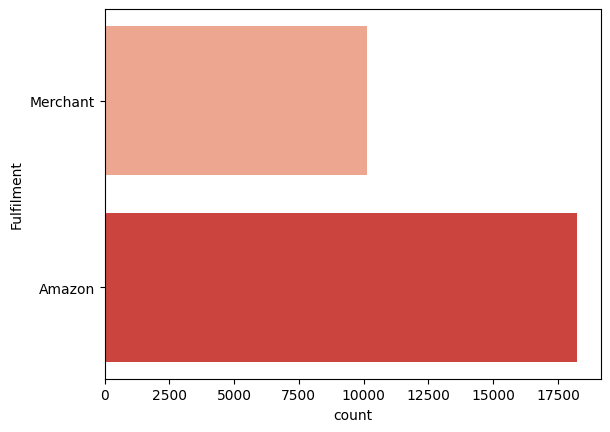

In [55]:
sns.countplot(df["Fulfilment"],palette="Reds")
plt.plot()

**Observtions**<br>

---


1.most of the products are get shipped by the amazon<br>
2.half of the products are fulfilled by the merchants as the taking in mind the no. of products fullfilled by the amazon.

In [56]:
df["Sales Channel"].value_counts()

,count
Sales Channel,
Amazon.in,28341
Non-Amazon,39


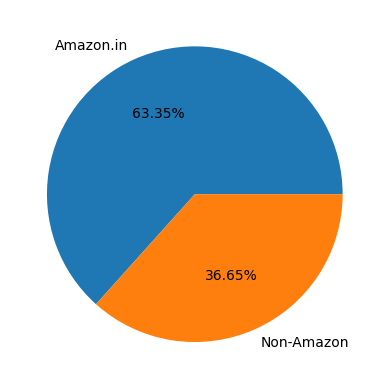

In [57]:
plt.pie(df["ship-service-level"].value_counts(),labels=df["Sales Channel"].value_counts().index,autopct="%1.2f%%")
plt.show()

**Observations**<br>

---


1.the shipping service has been 63.35% maintained by the amazon<br>
2.the another 36.65% is maintained by the non-amazon.

<ipython-input-85-1a8a02990fca>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["Category"],palette="plasma")


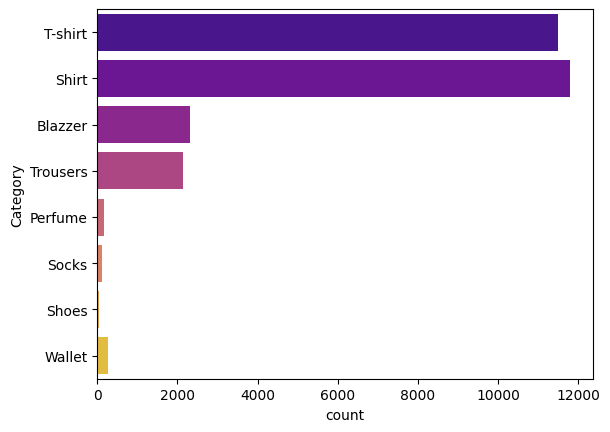

In [85]:
sns.countplot(df["Category"],palette="plasma")
plt.show()

**Observations**<br>

---


1.the amazon sales the are mostly come from the shirts.<br>
2.after the shirts the T-shirts are the major contributors to the amazons overall sales<br>
3.the blazzer are sales are in the place after the T-shirts.<br>
4.as equal or little less the Truoses are getting sold on amazon.<br>
5.wallets are getting sold at an descent levels<br>
6.perfurmes are sold in less volume <br>
7.the socks has a lower sales<br>
8.this month the Shoes were not sold as its sales were at 0.



<ipython-input-59-40aad9aed83c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Size"].value_counts().index, y=df["Size"].value_counts(),palette="plasma")


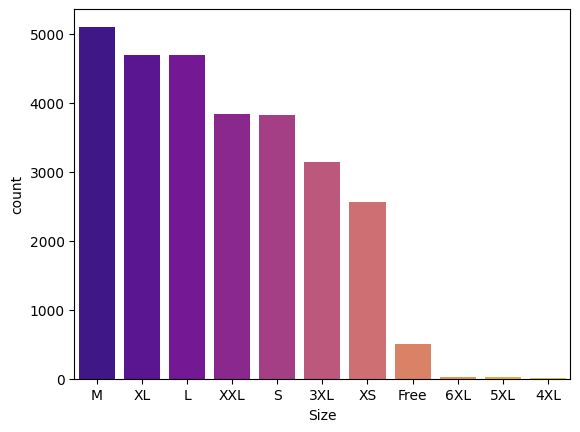

In [59]:
sns.barplot(x=df["Size"].value_counts().index, y=df["Size"].value_counts(),palette="plasma")
plt.show()

**Observations**

---
1.the most buyers are purchasing the cloths having size **M**.<br>
2.the less no of buyers are purchessing the cloths having size **4XL**


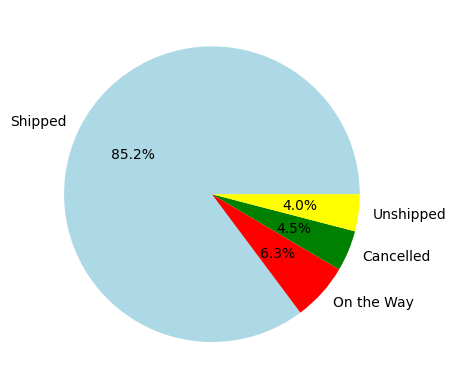

In [60]:
status_counts = df["Courier Status"].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%',colors=["lightblue","red","green","yellow"])
plt.show()

**Observations**

---
1. 85.2% products ars shipped<br>
2. 6.3% products are on the way to the gettig shipped.<br>
3. 4.5% products are cancelled by the customer<br>
4. 4.0% products are not has been shipped.


<ipython-input-61-62c571c9cc19>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(df["ship-state"],palette="Accent")


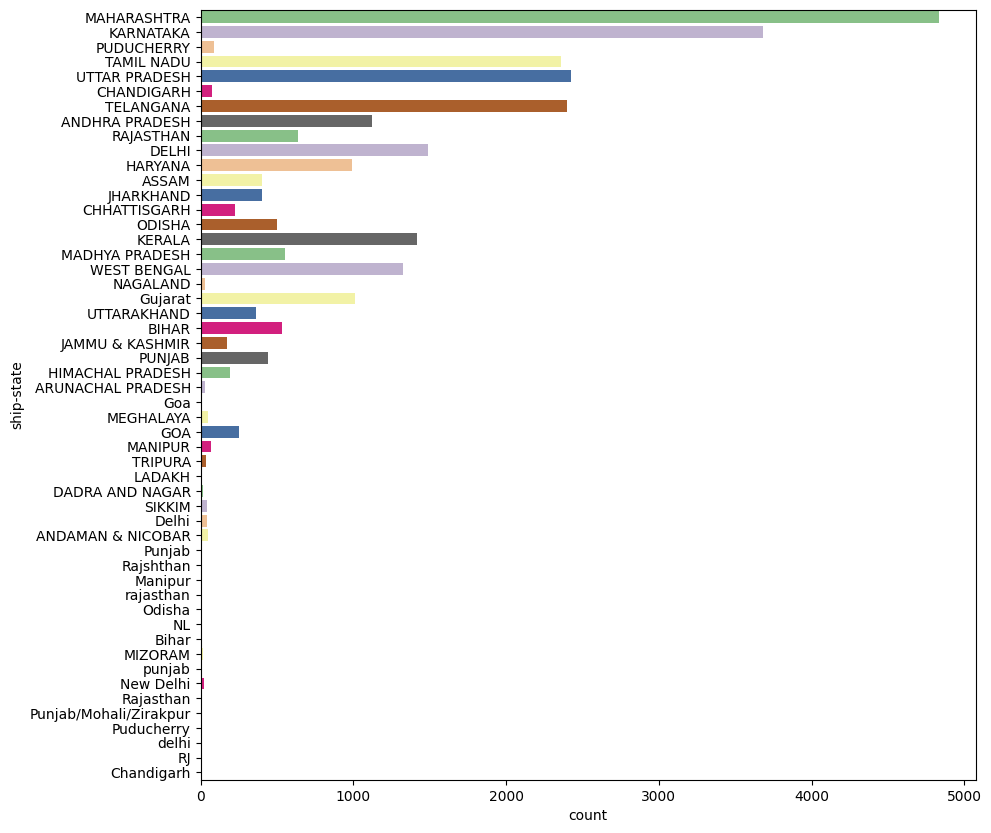

In [61]:
plt.figure(figsize=(10,10))
ax = sns.countplot(df["ship-state"],palette="Accent")
plt.show()



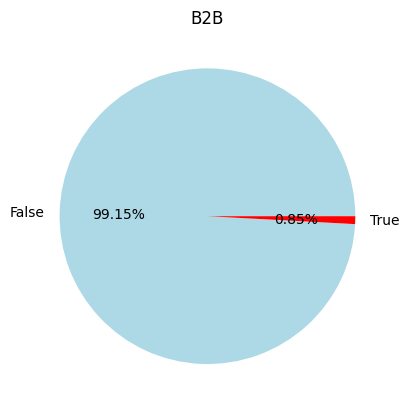

In [69]:
plt.pie(df["B2B"].value_counts(),labels=df["B2B"].value_counts().index,autopct="%1.2f%%",colors=["lightblue","red"])
plt.title("B2B")
plt.show()

**Observations**

---



1.   99.15% products sale is comming from the customers
2.   0.85% products sales came from the business to business sales.



In [70]:
neumerical_feature

['Date', 'Qty', 'Amount', 'ship-postal-code']

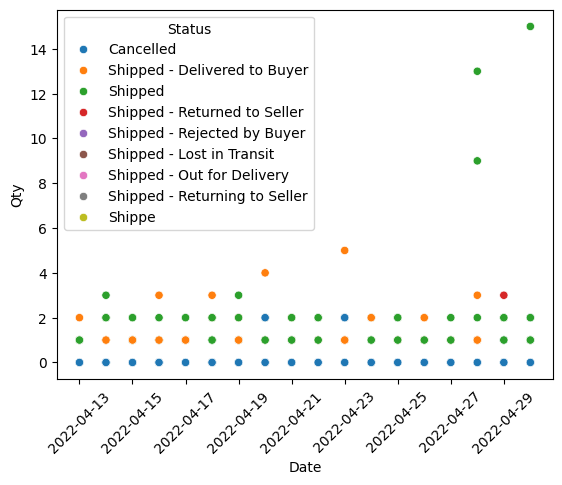

In [78]:
sns.scatterplot(x=df["Date"],y=df["Qty"],hue=df["Status"])
plt.xticks(rotation=45)
plt.show()

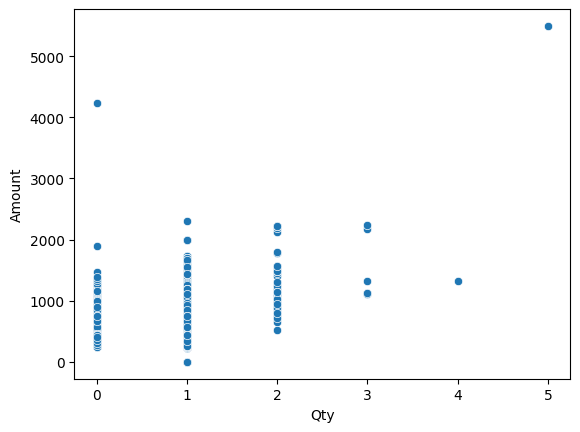

In [82]:
sns.scatterplot(x=df["Qty"],y=df["Amount"])
plt.show()